## Telecom Churn Case Study

### The steps would be -
1. Data Exploration
2. Data Cleaning
3. Data Preparation
4. Modelling
5. Evaluation

## Data Exploration

### Importing Libs

In [109]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [110]:
# Loading the Dataset
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [111]:
churn_data.shape
#Dimensions

(99999, 226)

In [112]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [113]:
churn_data.select_dtypes(include='object').columns.values
#Columns of object type

array(['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9',
       'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype=object)

In [114]:
churn_data.select_dtypes(include='float64').columns.values
#Columns of float type

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9

In [115]:
churn_data.select_dtypes(include='int64').columns.values
#Columns of int type

array(['mobile_number', 'circle_id', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aon'],
      dtype=object)

In [116]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Cleaning

#### Dropping columns with atleast equal or more than 30% null values

In [117]:
churn_data.dropna(axis=1, thresh=(.7*len(churn_data)), inplace=True)
#Setting the threshold as 80% NON-NA values
churn_data.shape

(99999, 186)

#### Imputing numeric data with median

In [118]:
churn_data_numeric=churn_data.select_dtypes(include=['int64', 'float64'])
churn_data_numeric = churn_data_numeric.fillna(churn_data_numeric.median())

In [119]:
churn_data_numeric.isnull().sum()

mobile_number         0
circle_id             0
loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6    

#### Imputing categorical data with mode

In [120]:
churn_data_cat=churn_data.select_dtypes(include='object')
#Imputing the categorical columns with it's most frequently occuring values for each of the columns
churn_data_cat = churn_data_cat.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [121]:
churn_data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   last_date_of_month_6  99999 non-null  object
 1   last_date_of_month_7  99999 non-null  object
 2   last_date_of_month_8  99999 non-null  object
 3   last_date_of_month_9  99999 non-null  object
 4   date_of_last_rech_6   99999 non-null  object
 5   date_of_last_rech_7   99999 non-null  object
 6   date_of_last_rech_8   99999 non-null  object
 7   date_of_last_rech_9   99999 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [122]:
#Preparing the the final dataframe to work upon
final_df=pd.concat([churn_data_numeric, churn_data_cat], axis= 1)
final_df.shape

(99999, 186)

In [123]:
final_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.0,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.0,99999.0,99999.0,99999.00

#### Since we are not going to do any time series analysis; Dropping the columns corresponding to date

In [124]:
final_df.drop(columns=list(churn_data_cat.columns.values), inplace=True)

In [125]:
final_df.describe()
final_df.shape

(99999, 178)

#### Filtering the high value customers (HVC) for month 6 and 7 (Pareto rule: 80% of the revenue being generated by 20% of the customers)

In [126]:
final_df['Avg_amt_6_7']=(final_df['total_rech_amt_6']+final_df['total_rech_amt_7'])/2
final_df.shape

(99999, 179)

In [127]:
final_df=final_df[final_df['Avg_amt_6_7'] >= final_df['Avg_amt_6_7'].quantile(.7)]
final_df.shape
#Almost 70k rows pertains to below 70th quantile

(30011, 179)

## Data Preparation

#### Deriving Churn : Will be using only 9th month data based on usage

In [128]:
final_df['Total_Usage_9']=final_df['total_ic_mou_9']+final_df['total_og_mou_9']+final_df['vol_2g_mb_9']+final_df['vol_3g_mb_9']

In [129]:
print(final_df[['Total_Usage_9']].describe())
final_df['Total_Usage_9']=final_df['Total_Usage_9'].apply(lambda x: 1 if x==0 else 0)

       Total_Usage_9
count   30011.000000
mean     1174.016686
std      1232.486199
min         0.000000
25%       425.620000
50%       893.170000
75%      1563.510000
max     39227.890000


In [130]:
final_df[['Total_Usage_9']].describe()

,Total_Usage_9
count,30011.000000
mean,0.086402
std,0.280961
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [131]:
final_df['Total_Usage_9'].value_counts()
#Highly Imbalanced data

0    27418
1     2593
Name: Total_Usage_9, dtype: int64

In [132]:
churn = (sum(final_df['Total_Usage_9'])/len(final_df['Total_Usage_9'].index))*100
#Churn %
churn

8.64016527273333

In [133]:
#Empty list for all columns corresponding to 9th month
drop_col=[]
for col in list(final_df.columns.values):
    if "_9" in col:
        drop_col.append(col)
    else:
        pass
#Printing the cols to be deleted except the target col of 'Total_Usage_9'
print(drop_col[:-1])

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [134]:
#Dropping all the cols corresponding to the 9th month
final_df.drop(columns=drop_col[:-1], inplace=True)

In [135]:
final_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_amt_6_7,Total_Usage_9
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.

#### Checking for Outliers

In [136]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
final_df[list(final_df.columns.values)[:-1]].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_amt_6_7
count,3.001100e+04,30011.0,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,109.0,0.0,0.0,0.0,587.284404,589.135427,534.857433,296.395727,304.669619,268.61183,418.947465,424.850559,377.901545,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.806102,95.846947,87.506619,181.711608,181.679717,168.852659,6.97933,7.097268,6.494314,1.567160,

#### The columns referring to volume based usage 'VBC' should be dropped - Since in India a very few fraction would use phone without subscribing for a prepaid plan

In [137]:
final_df.drop(columns=['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], inplace=True)

In [138]:
final_df.shape

(30011, 134)

In [139]:
#Dropping column 'mobile_number' & 'circle_id' col since it does not add any info
final_df.drop(columns=['mobile_number','circle_id'], inplace=True)
final_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,Avg_amt_6_7,Total_Usage_9
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,519.0,0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,380.0,0
16,0.0,0.0,0.0,430.975,299.869,187.894,5

In [140]:
final_df.shape

(30011, 132)

### Normalising the data

In [141]:
#Columns to normalize

col_normalize=[]
for col in list(final_df.columns.values):
    if final_df[str(col)].nunique()>2:
        col_normalize.append(col)
#col_normalize.remove(['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'])

df = final_df[col_normalize]
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,Avg_amt_6_7
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,1185.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,519.0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,380.0
16,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,

In [142]:
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,Avg_amt_6_7
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.395727,304.669619,268.61183,418.947465,424.850559,377.901545,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.806102,95.846947,87.506619,181.711608,181.679717,168.852659,6.97933,7.097268,6.494314,1.567160,1.862229,1.712739,283.633988,284.750474,263.225832,189.753131,199.877508,172.196408,203.139358,213.448614,179.672245,2.010766,2.034241,1.789728,394.988557,415.439956,353.884193,2.264425,2.207400,2.029314,5.916364,7.425487,6.885193,0.692507,0.047600,0.059131,686.697541,709.124730,623.774684,68.914262,70.470267,66.437989,160.208620,161.389328,155.448820,15.604895,16.519413,14.735579,244.938

### Creating a separate df for PCA and Traditional Logistics Regression

In [143]:
final_df_PCA=final_df.copy() # For PCA
final_df_LR=final_df.copy() # For traditional Log Reg
final_df=None
final_df_PCA.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,Avg_amt_6_7,Total_Usage_9
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,519.0,0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,380.0,0
16,0.0,0.0,0.0,430.975,299.869,187.894,5

#### Normalizing Dataframe

In [144]:
normalized_df=(df-df.mean())/df.std()

In [145]:
final_df_PCA.drop(columns=col_normalize, inplace=True) #Removing columns that were not normalized
final_df_PCA = pd.concat([final_df_PCA,normalized_df],axis=1) # Concatenating Normalised columns

In [146]:
final_df_PCA.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,Total_Usage_9,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,Avg_amt_6_7
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.088482,1.643375,5.356163,-0.517973,-0.519098,-0.464196,0.073400,0.292936,-0.109343,-0.014943,0.261689,0.246589,-0.047075,-0.096461,0.156156,-0.183343,-0.259853,-0.201312,0.507971,1.105019,-0.028080,2.433241,2.126833,2.311356,-0.227477,-0.201199,-0.231528,0.364991,0.663709,-0.020356,-0.452637,-0.412472,-0.390666,-0.370643,-0.414886,-0.313246,0.373210,1.351698,1.272632,-0.550976,-0.533909,-0.448098,-0.049314,-0.044442,0.178160,-0.076061,-0.321927,-0.016825,-0.303555,-0.017361,-0.017809,-0.301606,-0.145802,-0.398865,-0.067941,-0.228453,-0.251603,0.258750,0.274328,-0.158626,2.979995,1.716827,0.567319,0.585994,0.338715,-0.161103,0.261984,-0.059790,0.211760,0.587697,0.883667,1.052622,2.474625,1.523405,0.963469,0.920789,0.802177,1.033207,0.883122,0.657816,0.369963,0.737462,-0.099294,-0.237273,-0.135248,0.028182,0.265442,1.040337,0.890087,1.078539,-0.746192,-0.719738,-0.340275,1.636550,0.167283,5.025345,8.062736,3.383941,8.210214,-0.731860,-0.745932,4.704289,-0.284233,-0.278853,-0.257768,-0.298308,-0.324996,-0.314051,-0.333379,-0.338821,-0.319247,-0.294401,-0.308970,-0.329427,-0.302816,-0.298399,-0.297124,-0.157523,-0.154971,-0.144056,-0.473785,0.999087
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.471093,-0.209360,-0.807492,0.254679,0.096266,-0.501126,-0.690282,-0.708558,-0.507729,-0.219990,-0.177214,-0.177812,-0.247293,-0.225029,-0.202074,0.854400,0.490721,-0.319771,-0.403242,-0.462052,-0.505467,-0.307927,-0.314193,-0.321182,-0.227477,-0.201199,0.735007,0.248875,0.009136,-0.548026,-0.178643,-0.155208,-0.364888,-0.458195,-0.464484,-0.249532,-0.161411,-0.152373,-0.152963,-0.436536,-0.426688,-0.414918,-0.049314,-0.048387,-0.045302,-0.317719,-0.321927,0.146103,-0.303555,-0.017361,-0.017809,-0.270062,-0.405016,-0.659221,-0.284230,-0.362499,-0.425219,-0.463025,-0.672845,-0.648088,-0.340540,-0.333892,-0.337163,-0.523748,-0.713783,-0.725423,-0.205793,-0.192625,-0.206419,-0.095040,-0.278050,-0.283483,-0.144241,-0.145917,-0.132264,-0.204687,-0.326953,-0.337847,-0.563884,-0.774738,-0.773947,-0.343492,-0.099294,-0.237273,-

In [147]:
churn = (sum(final_df_PCA['Total_Usage_9'])/len(final_df_PCA['Total_Usage_9'].index))*100
#Churn %
churn

8.64016527273333

### Splitting Data into Training and Test Sets

In [148]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = final_df_PCA.drop(columns=['Total_Usage_9'],axis=1)

# Putting response variable to y
y = final_df_PCA['Total_Usage_9']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: Total_Usage_9, dtype: int64

In [149]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

## Modelling - 2 Models
1. PCA
2. Traditional Logistic Regression

### PCA Model

In [150]:
X_train.shape

(21007, 131)

In [151]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [152]:
pca.components_
#The principal components (the new basis vectors)

array([[-4.40467540e-19,  1.11022302e-16, -1.11022302e-16, ...,
        -1.26730571e-03,  5.31252211e-02,  1.48442742e-01],
       [ 2.85076768e-19,  0.00000000e+00,  0.00000000e+00, ...,
        -7.15248071e-05, -7.97181580e-02,  1.20175872e-01],
       [-3.48724221e-19,  8.32667268e-17,  1.35308431e-16, ...,
         4.11115779e-02,  2.06982672e-02,  1.78332237e-01],
       ...,
       [-0.00000000e+00, -6.70647651e-01, -3.72272594e-01, ...,
         9.23740251e-17, -8.67361738e-19, -1.23447354e-03],
       [ 9.99998533e-01,  7.78785476e-04, -1.21000865e-03, ...,
         4.91490868e-19,  7.52165257e-19,  2.01213995e-04],
       [-0.00000000e+00, -1.42237347e-02,  2.42699282e-01, ...,
         1.06522863e-17, -1.20888542e-16,  1.11246419e-02]])

In [153]:
print(len(list(pca.components_)))
#No. of principal components

131


In [154]:
pca.explained_variance_ratio_

array([1.00377051e-01, 8.83105042e-02, 5.22658412e-02, 4.83687828e-02,
       3.81167081e-02, 3.65903475e-02, 2.91254611e-02, 2.84952677e-02,
       2.69113214e-02, 2.61848271e-02, 2.43857940e-02, 2.34160898e-02,
       2.26018882e-02, 2.15153190e-02, 2.08558057e-02, 1.98509314e-02,
       1.80753183e-02, 1.78475983e-02, 1.66618578e-02, 1.47093419e-02,
       1.42685614e-02, 1.33528067e-02, 1.31623301e-02, 1.17676681e-02,
       1.15077112e-02, 1.06829196e-02, 9.82640526e-03, 9.64773937e-03,
       8.88864430e-03, 8.19600261e-03, 7.79775020e-03, 7.72387245e-03,
       7.59784986e-03, 7.17302421e-03, 6.99340263e-03, 6.60143794e-03,
       6.55978991e-03, 6.45326780e-03, 6.18441027e-03, 6.07361257e-03,
       5.77338923e-03, 5.57159529e-03, 5.17449856e-03, 5.12380211e-03,
       4.98190925e-03, 4.79055805e-03, 4.60806084e-03, 4.33938160e-03,
       4.24693770e-03, 4.04862377e-03, 3.94464888e-03, 3.78474759e-03,
       3.71048776e-03, 3.59377389e-03, 3.51092320e-03, 3.41454656e-03,
      

<BarContainer object of 131 artists>

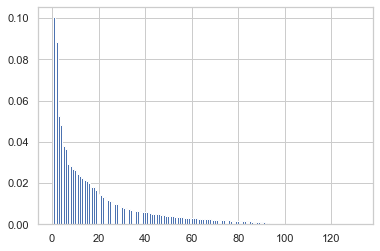

In [155]:
import matplotlib.pyplot as plt
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

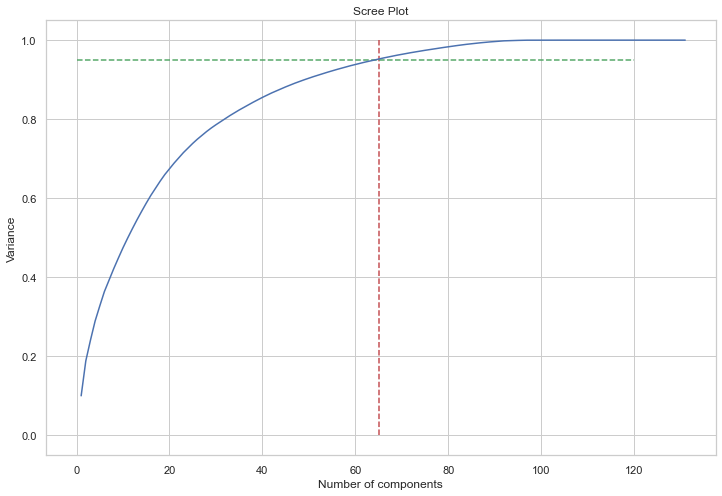

In [156]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.title("Scree Plot")
plt.ylabel("Variance")
plt.xlabel("Number of components")
plt.vlines(x=65, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(range(1, len(var_cumu)+1), var_cumu)

#### It seems 65 components are enough to explain 95% of the variance

In [157]:
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components=65)
df_train_pca = pca.fit_transform(X_train)

In [158]:
df_train_pca.shape

(21007, 65)

In [159]:
df_test_pca = pca.transform(X_test)
df_test_pca.shape

(9004, 65)

### Applying logistic regression on the data on our Principal components

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Class-weight is balanced to handle the imbalance issue
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca, y_train)

#### Making Predictions

In [161]:
pred_probs_test = model_pca.predict_proba(df_test_pca)
pred_probs_test.shape

(9004, 2)

In [162]:
#pred_probs_test = pred_probs_test[:,1].reshape(-1)
#pred_probs_test[:10]
pred_probs_test[:, 1]


array([0.84363012, 0.84549309, 0.09676243, ..., 0.04887108, 0.49272981,
       0.5359796 ])

## Evaluation

#### AUC provides an aggregate measure of performance across all possible classification thresholds

In [163]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

In [164]:
pred_probs_test = [1 if x>0.3 else 0 for x in pred_probs_test[:,1]]
pred_probs_test[:5]
# Let's check the overall accuracy on test data.
print("Accuracy: "+str(metrics.accuracy_score(y_test, pred_probs_test)))
# Confusion matrix 
confusion = metrics.confusion_matrix( y_test, pred_probs_test )
confusion

Accuracy: 0.6433807196801422


array([[5076, 3158],
       [  53,  717]], dtype=int64)

In [165]:
print("Sensitivity :"+ str(list(confusion)[1][1]/(list(confusion)[1][1]+list(confusion)[1][0])))

Sensitivity :0.9311688311688312


In [166]:
#Clearing the PCA df
final_df_PCA=None

### Traditional Logistic Regression

### Modelling

In [167]:
final_df_LR.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,Avg_amt_6_7,Total_Usage_9
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,1185.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,519.0,0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,380.0,0
16,0.0,0.0,0.0,430.975,299.869,187.894,5

In [168]:
final_df_LR.shape

(30011, 132)

In [169]:
# Normalizing the Data
final_df_LR.drop(columns=col_normalize, inplace=True) #Removing columns that were not normalized
final_df_LR = pd.concat([final_df_LR,normalized_df],axis=1) # Concatenating Normalised columns

In [170]:
# Putting feature variable to X1
X1 = final_df_LR.drop(columns=['Total_Usage_9'],axis=1)

# Putting response variable to y1
y1 = final_df_LR['Total_Usage_9']

y1.head()

7     1
8     0
13    0
16    0
17    0
Name: Total_Usage_9, dtype: int64

In [171]:
# Splitting the data into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, train_size=0.7,test_size=0.3,random_state=100)

### Feature selection using RFE

In [172]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 60)             # running RFE with 60 variables as output
rfe = rfe.fit(X_train1,y_train1)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=60 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [173]:
list(zip(X_train1.columns,rfe.support_,rfe.ranking_))

[('loc_og_t2o_mou', False, 72),
 ('std_og_t2o_mou', False, 71),
 ('loc_ic_t2o_mou', False, 70),
 ('std_og_t2c_mou_6', False, 69),
 ('std_og_t2c_mou_7', False, 68),
 ('std_og_t2c_mou_8', False, 67),
 ('std_ic_t2o_mou_6', False, 66),
 ('std_ic_t2o_mou_7', False, 65),
 ('std_ic_t2o_mou_8', False, 64),
 ('arpu_6', False, 3),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 29),
 ('onnet_mou_7', False, 24),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', False, 7),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 55),
 ('roam_ic_mou_7', False, 10),
 ('roam_ic_mou_8', False, 63),
 ('roam_og_mou_6', False, 30),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', False, 51),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 23),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 59),
 ('loc_og_t2f_mou_7', False, 54),
 ('loc_og_t2f_mou

In [174]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'arpu_8', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8',
       'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_8',
       'total_og_mou_6', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8',
       

In [175]:
X_train_RFE=X_train1[col]
X_test_RFE=X_test1[col]

### Assessing the model with statsmodel

In [176]:
X_train_sm = sm.add_constant(X_train_RFE)
logm = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Total_Usage_9   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20946
Model Family:                Binomial   Df Model:                           60
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3841.9
Date:                Mon, 31 Aug 2020   Deviance:                       7683.8
Time:                        01:00:54   Pearson chi2:                 1.19e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9545      0.072    -55.297      0.000      -4.095      -3.814
arpu_7                 0.1676      0.059      2.832      0.005       0.052       0.284
arpu_8                 0.2832      0.136      2.081      0.037       0.017       0.550
onnet_mou_8            0.6994      0.996      0.702      0.483      -1.253       2.651
offnet_mou_6           0.4480      0.165      2.708      0.007       0.124       0.772
offnet_mou_8           0.0010      1.008      0.001      0.999      -1.976       1.978
roam_og_mou_7          0.1150      0.030      3.811      0.000       0.056       0.174
roam_og_mou_8         -0.0579      0.223     -0.259      0.795      -0.495       0.380
loc_og_t2t_mou_6      -0.0983      0.385     -0.255      0.799      -0.853       0.656
loc_og_t2t_mou_8      -0.5923      0.861     -0.688      0.492      -2.281       1.096
loc_og_t2m_mou_6      -0.5901      0.396     -1.489      0.136      -1.367       0.186
loc_og_t2m_mou_8       0.0454      0.848      0.054      0.957      -1.616       1.707
loc_og_mou_6           0.6047      0.657      0.920      0.358      -0.684       1.893
loc_og_mou_8          -0.4490      1.339     -0.335      0.737      -3.073       2.175
std_og_t2t_mou_6       0.3899      0.151      2.581      0.010       0.094       0.686
std_og_t2t_mou_8      -0.3909      0.289     -1.353      0.176      -0.957       0.175
std_og_t2m_mou_7       0.1492      0.050      2.987      0.003       0.051       0.247
std_og_t2f_mou_8      -0.1024      0.081     -1.258      0.208      -0.262       0.057
std_og_mou_6          -0.0828      0.603     -0.137      0.891      -1.266       1.100
std_og_mou_8          -0.4480      0.735     -0.609      0.542      -1.889       0.993
total_og_mou_6        -0.3180      0.680     -0.468      0.640      -1.651       1.015
total_og_mou_8        -0.3574      1.576     -0.227      0.821      -3.446       2.731
loc_ic_t2t_mou_6       0.2004      0.251      0.797      0.425      -0.292       0.693
loc_ic_t2t_mou_8       0.5554      0.522      1.063      0.288      -0.469       1.579
loc_ic_t2m_mou_6       0.3612      0.350      1.032      0.302      -0.325       1.047
loc_ic_t2m_mou_7       0.2655      0.126      2.111      0.035       0.019       0.512
loc_ic_t2m_mou_8       0.4491      0.724      0.620      0.535      -0.970       1.868
loc_ic_mou_6           0.3134      0.852      0.368      0.713      -1.356       1.982
loc_ic_mou_7           0.2264      0.681      0.333      0.739      -1.108       1.561
loc_ic_mou_8           6.6091      1.266      5.222      0.000       4.128       9.090
std_ic_t2t_mou_7       0.1145      0.061      1.875      0.061      -0.005       0.234
std_ic_t2m_mou_6      -0.1449      0.069     -2.098      0.036      -0.280      -0.010
std_ic_t2m_mou_8       0.5410      0.1

In [177]:
# Getting the predicted values (probability) on the train set
y_train_pred_prob = res.predict(X_train_sm)
y_train_pred_prob[:10]

4715     0.097158
15222    0.002020
60145    0.035526
62445    0.033888
88349    0.011970
71755    0.011736
12269    0.079836
60558    0.007585
56742    0.010373
16606    0.005496
dtype: float64

In [178]:
y_train_pred_prob = y_train_pred_prob.values.reshape(-1)
y_train_pred_prob[:10]

array([0.09715836, 0.0020197 , 0.0355259 , 0.03388823, 0.01196982,
       0.01173628, 0.07983557, 0.00758455, 0.01037279, 0.00549583])

In [179]:
y_train_pred = [1 if x>0.5 else 0 for x in y_train_pred_prob]

In [180]:
y_train_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [181]:
# Let's check the overall accuracy on train data.
print(metrics.accuracy_score(y_train1, y_train_pred))

0.9328795163516923


In [182]:
# Checking on test data
X_test_sm = sm.add_constant(X_test_RFE)
y_test_pred_prob = res.predict(X_test_sm)

In [183]:
y_test_pred = [1 if x>0.5 else 0 for x in y_test_pred_prob]

In [184]:
# Let's check the overall accuracy on test data.
print(metrics.accuracy_score(y_test1, y_test_pred))

0.9368058640604175


### Checking VIFs

In [185]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [186]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,total_og_mou_8,2963.26
37,total_ic_mou_8,1792.62
2,onnet_mou_8,1759.82
4,offnet_mou_8,1574.68
28,loc_ic_mou_8,1358.13
12,loc_og_mou_8,837.86
36,total_ic_mou_7,812.51
35,total_ic_mou_6,759.23
11,loc_og_mou_6,687.12
19,total_og_mou_6,660.58


In [187]:
X_train_RFE.head()

,arpu_7,arpu_8,onnet_mou_8,offnet_mou_6,offnet_mou_8,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_8,loc_og_mou_6,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_8,std_og_t2m_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_8,total_og_mou_6,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_8,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_8,monthly_3g_8,sachet_3g_7,sachet_3g_8,aon
4715,-0.235085,-0.301033,0.333677,-0.561969,-0.609393,-0.225029,-0.202074,-0.396095,-0.336651,-0.720628,-0.714511,-0.740263,-0.692845,0.355262,0.593569,-0.346084,-0.152963,0.106429,0.240612,-0.291142,-0.158291,-0.421130,-0.415124,-0.680938,-0.639388,-0.698512,-0.748035,-0.698221,-0.755924,0.574867,0.093229,0.736356,0.437456,0.486138,0.866714,-0.507538,-0.433365,-0.328760,-0.237273,-0.165876,-0.160538,-0.156160,-0.096025,1.258289,1.558746,-0.271906,-0.653914,-0.589654,0.474540,-0.257768,-0.314051,-0.333379,-0.338821,-0.319247,-0.294401,-0.329427,-0.297124,-0.154971,-0.144056,-0.934173
15222,-0.173806,-0.110632,-0.295231,-0.421651,-0.439358,-0.225029,-0.202074,0.064501,0.185526,0.041618,-0.251094,0.108834,0.091064,-0.463133,-0.419956,-0.487410,-0.152963,-0.651334,-0.574454,-0.538735,-0.471943,-0.308508,-0.183571,1.448835,0.337317,0.418995,1.124545,0.117195,0.702724,-0.164878,-0.316947,-0.289656,-0.337657,-0.331981,-0.340331,0.831400,-0.035075,0.465205,-0.237273,-0.046783,0.001946,-0.010154,-0.096025,-0.511524,-0.762279,-0.258613,0.203531,0.704574,-0.247283,-0.066106,-0.039770,-0.333379,2.240673,2.479739,-0.294401,-0.329427,-0.297124,-0.154971,-0.144056,-0.192835
60145,0.461524,0.056449,-0.394584,-0.451984,0.070513,-0.225029,-0.202074,-0.289761,-0.011836,0.082642,1.028032,-0.133912,0.636637,-0.463133,-0.419956,-0.464164,-0.152963,-0.651334,-0.573837,-0.686095,-0.184866,-0.248792,-0.148526,-0.240104,0.492235,0.104602,-0.341775,0.257031,-0.047617,-0.199474,-0.277374,-0.289656,-0.335877,-0.358195,-0.343170,0.759299,2.513711,1.329520,-0.237273,6.368477,11.718053,7.208584,-0.096025,0.425436,0.503734,0.055434,-0.653914,-0.314286,-0.278853,-0.257768,-0.314051,-0.333379,-0.338821,-0.319247,-0.294401,-0.329427,-0.297124,-0.154971,-0.144056,1.043754
62445,-0.039714,0.020389,-0.344199,0.473259,0.920600,-0.225029,-0.202074,0.347226,0.076444,-0.049035,-0.238363,0.166510,-0.121236,-0.463133,-0.413225,0.507237,-0.152963,0.126134,0.569814,0.199305,0.437453,-0.411608,-0.402392,-0.577170,-0.674397,-0.659386,-0.647519,-0.649757,-0.699803,-0.179047,0.669811,0.129752,0.353388,-0.105177,0.047799,-0.430896,-0.630685,-0.601417,-0.237273,-0.043066,-0.160538,-0.156160,-0.096025,0.529542,0.609235,0.063742,-0.671295,-0.334939,-0.278853,-0.257768,-0.314051,-0.333379,-0.338821,-0.319247,-0.294401,-0.329427,-0.297124,-0.154971,-0.144056,1.383150
88349,0.015704,-0.522617,-0.439368,0.120932,-0.426866,-0.225029,-0.202074,-0.299601,-0.291424,0.203513,-0.334703,-0.071678,-0.393763,-0.232949,-0.310917,-0.087478,-0.152963,-0.094782,-0.380650,-0.140466,-0.561158,-0.232396,-0.219130,-0.032568,-0.409202,-0.019627,-0.187062,-0.317429,-0.175715,0.043526,0.317609,-0.063046,0.092502,0.170368,-0.169012,-0.155283,-0.227470,-0.172382,4.051845,-0.165876,-0.160538,0.166147,-0.054908,1.466502,0.187231,-0.487917,-0.769785,-0.451970,-0.278853,-0.257768,-0.314051,-0.333379,-0.338821,-0.319247,-0.294401,-0.329427,-0.297124,-0.154971,-0.144056,-0.845992


In [188]:
# As total_og_mou_8 variable have very high vif  values we will drop them
col=col.drop('total_og_mou_8',1)
col

Index(['arpu_7', 'arpu_8', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8',
       'loc_og_mou_6', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_8',
       'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6',
       'm

In [189]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_RFE[col])
logm1 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Total_Usage_9   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20947
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3841.9
Date:                Mon, 31 Aug 2020   Deviance:                       7683.8
Time:                        01:01:00   Pearson chi2:                 1.19e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9543      0.072    -55.298      0.000      -4.094      -3.814
arpu_7                 0.1677      0.059      2.831      0.005       0.052       0.284
arpu_8                 0.2830      0.136      2.079      0.038       0.016       0.550
onnet_mou_8            0.5147      0.562      0.917      0.359      -0.586       1.615
offnet_mou_6           0.4507      0.165      2.731      0.006       0.127       0.774
offnet_mou_8          -0.1947      0.510     -0.382      0.702      -1.194       0.804
roam_og_mou_7          0.1148      0.030      3.806      0.000       0.056       0.174
roam_og_mou_8         -0.0150      0.116     -0.130      0.897      -0.242       0.212
loc_og_t2t_mou_6      -0.0726      0.371     -0.196      0.845      -0.799       0.654
loc_og_t2t_mou_8      -0.6140      0.856     -0.717      0.473      -2.292       1.064
loc_og_t2m_mou_6      -0.5640      0.382     -1.476      0.140      -1.313       0.185
loc_og_t2m_mou_8       0.0271      0.844      0.032      0.974      -1.627       1.681
loc_og_mou_6           0.5953      0.658      0.905      0.366      -0.694       1.885
loc_og_mou_8          -0.4602      1.336     -0.344      0.731      -3.080       2.159
std_og_t2t_mou_6       0.3921      0.151      2.601      0.009       0.097       0.688
std_og_t2t_mou_8      -0.3975      0.287     -1.383      0.167      -0.961       0.166
std_og_t2m_mou_7       0.1492      0.050      2.985      0.003       0.051       0.247
std_og_t2f_mou_8      -0.1024      0.081     -1.258      0.209      -0.262       0.057
std_og_mou_6          -0.0350      0.562     -0.062      0.950      -1.136       1.066
std_og_mou_8          -0.5150      0.662     -0.778      0.436      -1.812       0.782
total_og_mou_6        -0.3733      0.631     -0.592      0.554      -1.610       0.863
loc_ic_t2t_mou_6       0.2034      0.251      0.810      0.418      -0.289       0.696
loc_ic_t2t_mou_8       0.5506      0.522      1.055      0.291      -0.472       1.573
loc_ic_t2m_mou_6       0.3653      0.350      1.045      0.296      -0.320       1.050
loc_ic_t2m_mou_7       0.2654      0.126      2.109      0.035       0.019       0.512
loc_ic_t2m_mou_8       0.4426      0.723      0.612      0.540      -0.974       1.859
loc_ic_mou_6           0.2906      0.845      0.344      0.731      -1.365       1.946
loc_ic_mou_7           0.2279      0.681      0.335      0.738      -1.106       1.562
loc_ic_mou_8           6.7959      0.960      7.079      0.000       4.914       8.678
std_ic_t2t_mou_7       0.1147      0.061      1.879      0.060      -0.005       0.234
std_ic_t2m_mou_6      -0.1447      0.069     -2.095      0.036      -0.280      -0.009
std_ic_t2m_mou_8       0.5420      0.188      2.880      0.004       0.173       0.911
std_ic_mou_6           0.5284      0.3

##### Let's check the VIFs again

In [190]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE[col].values, i) for i in range(X_train_RFE[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,loc_og_mou_8,837.83
35,total_ic_mou_7,812.44
34,total_ic_mou_6,758.06
11,loc_og_mou_6,686.82
25,loc_ic_mou_6,650.54
19,total_og_mou_6,646.94
26,loc_ic_mou_7,603.18
36,total_ic_mou_8,597.11
2,onnet_mou_8,572.47
18,std_og_mou_8,556.02


In [191]:
# Columns with very high vif
list_col_high_vif=list(vif[vif.VIF>100]['Features'])

In [192]:
# Dropping columns with very high vif
col=col.drop(list_col_high_vif,1)
col

Index(['arpu_7', 'arpu_8', 'offnet_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'sachet_3g_8', 'aon'],
      dtype='object')

In [193]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_RFE[col])
logm2 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Total_Usage_9   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20968
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4323.6
Date:                Mon, 31 Aug 2020   Deviance:                       8647.3
Time:                        01:01:05   Pearson chi2:                 2.23e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8198      0.063    -60.277      0.000      -3.944      -3.696
arpu_7                 0.3665      0.054      6.728      0.000       0.260       0.473
arpu_8                -0.7904      0.144     -5.488      0.000      -1.073      -0.508
offnet_mou_6           0.1431      0.032      4.519      0.000       0.081       0.205
roam_og_mou_7          0.0964      0.027      3.561      0.000       0.043       0.149
roam_og_mou_8          0.1879      0.031      6.136      0.000       0.128       0.248
std_og_t2t_mou_6       0.0898      0.025      3.625      0.000       0.041       0.138
std_og_t2m_mou_7      -0.0332      0.037     -0.894      0.371      -0.106       0.040
std_og_t2f_mou_8      -0.2069      0.095     -2.177      0.029      -0.393      -0.021
loc_ic_t2t_mou_6       0.0967      0.045      2.128      0.033       0.008       0.186
loc_ic_t2t_mou_8      -0.8866      0.146     -6.071      0.000      -1.173      -0.600
loc_ic_t2m_mou_6       0.1387      0.047      2.964      0.003       0.047       0.230
loc_ic_t2m_mou_7       0.1639      0.075      2.193      0.028       0.017       0.310
loc_ic_t2m_mou_8      -1.1809      0.122     -9.717      0.000      -1.419      -0.943
std_ic_t2t_mou_7       0.0456      0.023      2.023      0.043       0.001       0.090
std_ic_t2m_mou_6       0.0596      0.036      1.640      0.101      -0.012       0.131
std_ic_t2m_mou_8      -0.2608      0.081     -3.226      0.001      -0.419      -0.102
spl_ic_mou_8          -0.5516      0.078     -7.098      0.000      -0.704      -0.399
isd_ic_mou_6           0.1164      0.045      2.597      0.009       0.029       0.204
isd_ic_mou_7           0.0811      0.068      1.186      0.235      -0.053       0.215
isd_ic_mou_8          -0.2145      0.086     -2.490      0.013      -0.383      -0.046
ic_others_8           -0.1598      0.121     -1.318      0.187      -0.397       0.078
total_rech_num_7       0.1340      0.045      2.993      0.003       0.046       0.222
total_rech_num_8      -0.7345      0.081     -9.063      0.000      -0.893      -0.576
total_rech_amt_8      -0.0108      0.173     -0.062      0.950      -0.350       0.329
max_rech_amt_8        -0.0109      0.063     -0.174      0.862      -0.134       0.112
last_day_rch_amt_8    -0.8149      0.077    -10.559      0.000      -0.966      -0.664
vol_2g_mb_7            0.0773      0.045      1.700      0.089      -0.012       0.166
vol_2g_mb_8           -0.1617      0.080     -2.020      0.043      -0.319      -0.005
vol_3g_mb_8            0.0190      0.075      0.252      0.801      -0.129       0.167
monthly_2g_6          -0.0831      0.047     -1.768      0.077      -0.175       0.009
monthly_2g_7          -0.1523      0.053     -2.866      0.004      -0.256      -0.048
monthly_2g_8          -0.3203      0.0

In [194]:
# Getting the predicted values (probability) on the train set
y_train_pred_prob = res.predict(X_train_sm)
y_train_pred_prob[:10]

4715     0.072265
15222    0.008365
60145    0.031541
62445    0.050302
88349    0.011198
71755    0.009489
12269    0.139565
60558    0.006667
56742    0.022287
16606    0.005278
dtype: float64

In [195]:
y_train_pred_prob = y_train_pred_prob.values.reshape(-1)
y_train_pred_prob[:10]

array([0.07226483, 0.00836512, 0.03154051, 0.05030217, 0.01119806,
       0.00948887, 0.13956496, 0.00666676, 0.02228658, 0.00527784])

In [196]:
y_train_pred = [1 if x>0.5 else 0 for x in y_train_pred_prob]

In [197]:
# Let's check the overall accuracy on train data.
print(metrics.accuracy_score(y_train1, y_train_pred))

0.9180749274051506


In [198]:
# Checking on test data
X_test_sm = sm.add_constant(X_test_RFE[col])
y_test_pred_prob = res.predict(X_test_sm)

In [199]:
y_test_pred = [1 if x>0.5 else 0 for x in y_test_pred_prob]

# Let's check the overall accuracy on test data.
print(metrics.accuracy_score(y_test1, y_test_pred))

0.9223678365171035


##### Let's check the VIFs again

In [200]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE[col].values, i) for i in range(X_train_RFE[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,total_rech_amt_8,13.26
1,arpu_8,11.28
11,loc_ic_t2m_mou_7,4.29
22,total_rech_num_8,3.75
12,loc_ic_t2m_mou_8,3.44
21,total_rech_num_7,3.26
18,isd_ic_mou_7,3.10
10,loc_ic_t2m_mou_6,2.87
0,arpu_7,2.85
24,max_rech_amt_8,2.59


In [201]:
# Dropping columns with very high vif
col=col.drop('total_rech_amt_8',1)
col

Index(['arpu_7', 'arpu_8', 'offnet_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_7',
       'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_7', 'sachet_3g_8', 'aon'],
      dtype='object')

In [202]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_RFE[col])
logm3 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Total_Usage_9   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20969
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4323.6
Date:                Mon, 31 Aug 2020   Deviance:                       8647.3
Time:                        01:01:08   Pearson chi2:                 2.27e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8197      0.063    -60.295      0.000      -3.944      -3.696
arpu_7                 0.3665      0.054      6.728      0.000       0.260       0.473
arpu_8                -0.7971      0.096     -8.324      0.000      -0.985      -0.609
offnet_mou_6           0.1430      0.032      4.523      0.000       0.081       0.205
roam_og_mou_7          0.0964      0.027      3.562      0.000       0.043       0.149
roam_og_mou_8          0.1876      0.030      6.223      0.000       0.128       0.247
std_og_t2t_mou_6       0.0896      0.025      3.637      0.000       0.041       0.138
std_og_t2m_mou_7      -0.0332      0.037     -0.896      0.370      -0.106       0.039
std_og_t2f_mou_8      -0.2066      0.095     -2.178      0.029      -0.393      -0.021
loc_ic_t2t_mou_6       0.0967      0.045      2.128      0.033       0.008       0.186
loc_ic_t2t_mou_8      -0.8869      0.146     -6.075      0.000      -1.173      -0.601
loc_ic_t2m_mou_6       0.1386      0.047      2.963      0.003       0.047       0.230
loc_ic_t2m_mou_7       0.1640      0.075      2.195      0.028       0.018       0.310
loc_ic_t2m_mou_8      -1.1812      0.121     -9.729      0.000      -1.419      -0.943
std_ic_t2t_mou_7       0.0455      0.023      2.023      0.043       0.001       0.090
std_ic_t2m_mou_6       0.0596      0.036      1.641      0.101      -0.012       0.131
std_ic_t2m_mou_8      -0.2608      0.081     -3.226      0.001      -0.419      -0.102
spl_ic_mou_8          -0.5515      0.078     -7.098      0.000      -0.704      -0.399
isd_ic_mou_6           0.1164      0.045      2.596      0.009       0.029       0.204
isd_ic_mou_7           0.0812      0.068      1.187      0.235      -0.053       0.215
isd_ic_mou_8          -0.2145      0.086     -2.489      0.013      -0.383      -0.046
ic_others_8           -0.1597      0.121     -1.318      0.188      -0.397       0.078
total_rech_num_7       0.1341      0.045      2.996      0.003       0.046       0.222
total_rech_num_8      -0.7365      0.075     -9.854      0.000      -0.883      -0.590
max_rech_amt_8        -0.0128      0.054     -0.236      0.813      -0.119       0.094
last_day_rch_amt_8    -0.8161      0.074    -10.971      0.000      -0.962      -0.670
vol_2g_mb_7            0.0773      0.045      1.700      0.089      -0.012       0.166
vol_2g_mb_8           -0.1616      0.080     -2.019      0.043      -0.318      -0.005
vol_3g_mb_8            0.0191      0.075      0.254      0.800      -0.129       0.167
monthly_2g_6          -0.0831      0.047     -1.769      0.077      -0.175       0.009
monthly_2g_7          -0.1523      0.053     -2.866      0.004      -0.256      -0.048
monthly_2g_8          -0.3203      0.079     -4.043      0.000      -0.476      -0.165
sachet_2g_6            0.1358      0.0

In [203]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE[col].values, i) for i in range(X_train_RFE[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,loc_ic_t2m_mou_7,4.29
22,total_rech_num_8,3.52
12,loc_ic_t2m_mou_8,3.44
21,total_rech_num_7,3.25
1,arpu_8,3.15
18,isd_ic_mou_7,3.10
10,loc_ic_t2m_mou_6,2.87
0,arpu_7,2.82
23,max_rech_amt_8,2.41
27,vol_3g_mb_8,2.39


In [204]:
# Dropping column 'max_rech_amt_8' with high p-value
col=col.drop('max_rech_amt_8',1)
col

Index(['arpu_7', 'arpu_8', 'offnet_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7',
       'sachet_3g_8', 'aon'],
      dtype='object')

In [205]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_RFE[col])
logm4 = sm.GLM(y_train1,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Total_Usage_9   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20970
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4323.7
Date:                Mon, 31 Aug 2020   Deviance:                       8647.3
Time:                        01:01:10   Pearson chi2:                 2.24e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8208      0.063    -60.446      0.000      -3.945      -3.697
arpu_7                 0.3648      0.054      6.754      0.000       0.259       0.471
arpu_8                -0.8044      0.091     -8.869      0.000      -0.982      -0.627
offnet_mou_6           0.1433      0.032      4.540      0.000       0.081       0.205
roam_og_mou_7          0.0966      0.027      3.569      0.000       0.044       0.150
roam_og_mou_8          0.1877      0.030      6.221      0.000       0.129       0.247
std_og_t2t_mou_6       0.0899      0.025      3.653      0.000       0.042       0.138
std_og_t2m_mou_7      -0.0332      0.037     -0.894      0.371      -0.106       0.039
std_og_t2f_mou_8      -0.2074      0.095     -2.185      0.029      -0.393      -0.021
loc_ic_t2t_mou_6       0.0969      0.045      2.131      0.033       0.008       0.186
loc_ic_t2t_mou_8      -0.8871      0.146     -6.077      0.000      -1.173      -0.601
loc_ic_t2m_mou_6       0.1389      0.047      2.969      0.003       0.047       0.231
loc_ic_t2m_mou_7       0.1639      0.075      2.194      0.028       0.017       0.310
loc_ic_t2m_mou_8      -1.1817      0.121     -9.734      0.000      -1.420      -0.944
std_ic_t2t_mou_7       0.0456      0.023      2.023      0.043       0.001       0.090
std_ic_t2m_mou_6       0.0597      0.036      1.642      0.101      -0.012       0.131
std_ic_t2m_mou_8      -0.2616      0.081     -3.235      0.001      -0.420      -0.103
spl_ic_mou_8          -0.5518      0.078     -7.101      0.000      -0.704      -0.400
isd_ic_mou_6           0.1164      0.045      2.597      0.009       0.029       0.204
isd_ic_mou_7           0.0810      0.068      1.184      0.236      -0.053       0.215
isd_ic_mou_8          -0.2144      0.086     -2.489      0.013      -0.383      -0.046
ic_others_8           -0.1598      0.121     -1.319      0.187      -0.397       0.078
total_rech_num_7       0.1354      0.044      3.047      0.002       0.048       0.222
total_rech_num_8      -0.7346      0.074     -9.883      0.000      -0.880      -0.589
last_day_rch_amt_8    -0.8184      0.074    -11.111      0.000      -0.963      -0.674
vol_2g_mb_7            0.0773      0.045      1.699      0.089      -0.012       0.166
vol_2g_mb_8           -0.1619      0.080     -2.024      0.043      -0.319      -0.005
vol_3g_mb_8            0.0178      0.075      0.237      0.813      -0.130       0.165
monthly_2g_6          -0.0831      0.047     -1.770      0.077      -0.175       0.009
monthly_2g_7          -0.1520      0.053     -2.861      0.004      -0.256      -0.048
monthly_2g_8          -0.3213      0.079     -4.060      0.000      -0.476      -0.166
sachet_2g_6            0.1360      0.037      3.633      0.000       0.063       0.209
sachet_2g_8           -0.3918      0.0

In [206]:
vif = pd.DataFrame()
vif['Features'] = X_train_RFE[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE[col].values, i) for i in range(X_train_RFE[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,loc_ic_t2m_mou_7,4.29
22,total_rech_num_8,3.51
12,loc_ic_t2m_mou_8,3.44
21,total_rech_num_7,3.20
18,isd_ic_mou_7,3.10
1,arpu_8,3.09
10,loc_ic_t2m_mou_6,2.87
0,arpu_7,2.77
17,isd_ic_mou_6,2.38
26,vol_3g_mb_8,2.37


In [207]:
# Getting the predicted values (probability) on the train set
y_train_pred_prob = res.predict(X_train_sm)
y_train_pred_prob[:10]

4715     0.072201
15222    0.008337
60145    0.031312
62445    0.050099
88349    0.011169
71755    0.009485
12269    0.139113
60558    0.006647
56742    0.022337
16606    0.005269
dtype: float64

In [208]:
y_train_pred_prob = y_train_pred_prob.values.reshape(-1)
y_train_pred_prob[:10]

array([0.07220073, 0.00833675, 0.03131151, 0.05009937, 0.01116863,
       0.00948541, 0.13911345, 0.006647  , 0.02233729, 0.00526896])

In [209]:
y_train_pred = [1 if x>0.5 else 0 for x in y_train_pred_prob]

In [210]:
# Let's check the overall accuracy on train data.
print(metrics.accuracy_score(y_train1, y_train_pred))

0.9180273242252582


In [211]:
# Checking on test data
X_test_sm = sm.add_constant(X_test_RFE[col])
y_test_pred_prob = res.predict(X_test_sm)

In [212]:
y_test_pred = [1 if x>0.2 else 0 for x in y_test_pred_prob]

# Let's check the overall accuracy on test data.
print(metrics.accuracy_score(y_test1, y_test_pred))

0.8988227454464682


In [213]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_test1, y_test_pred )
confusion

array([[7546,  688],
       [ 223,  547]], dtype=int64)

In [214]:
print("Sensitivity :"+ str(list(confusion)[1][1]/(list(confusion)[1][1]+list(confusion)[1][0])))

Sensitivity :0.7103896103896103


## Plotting a heatmap in order to identify the strong indicators 

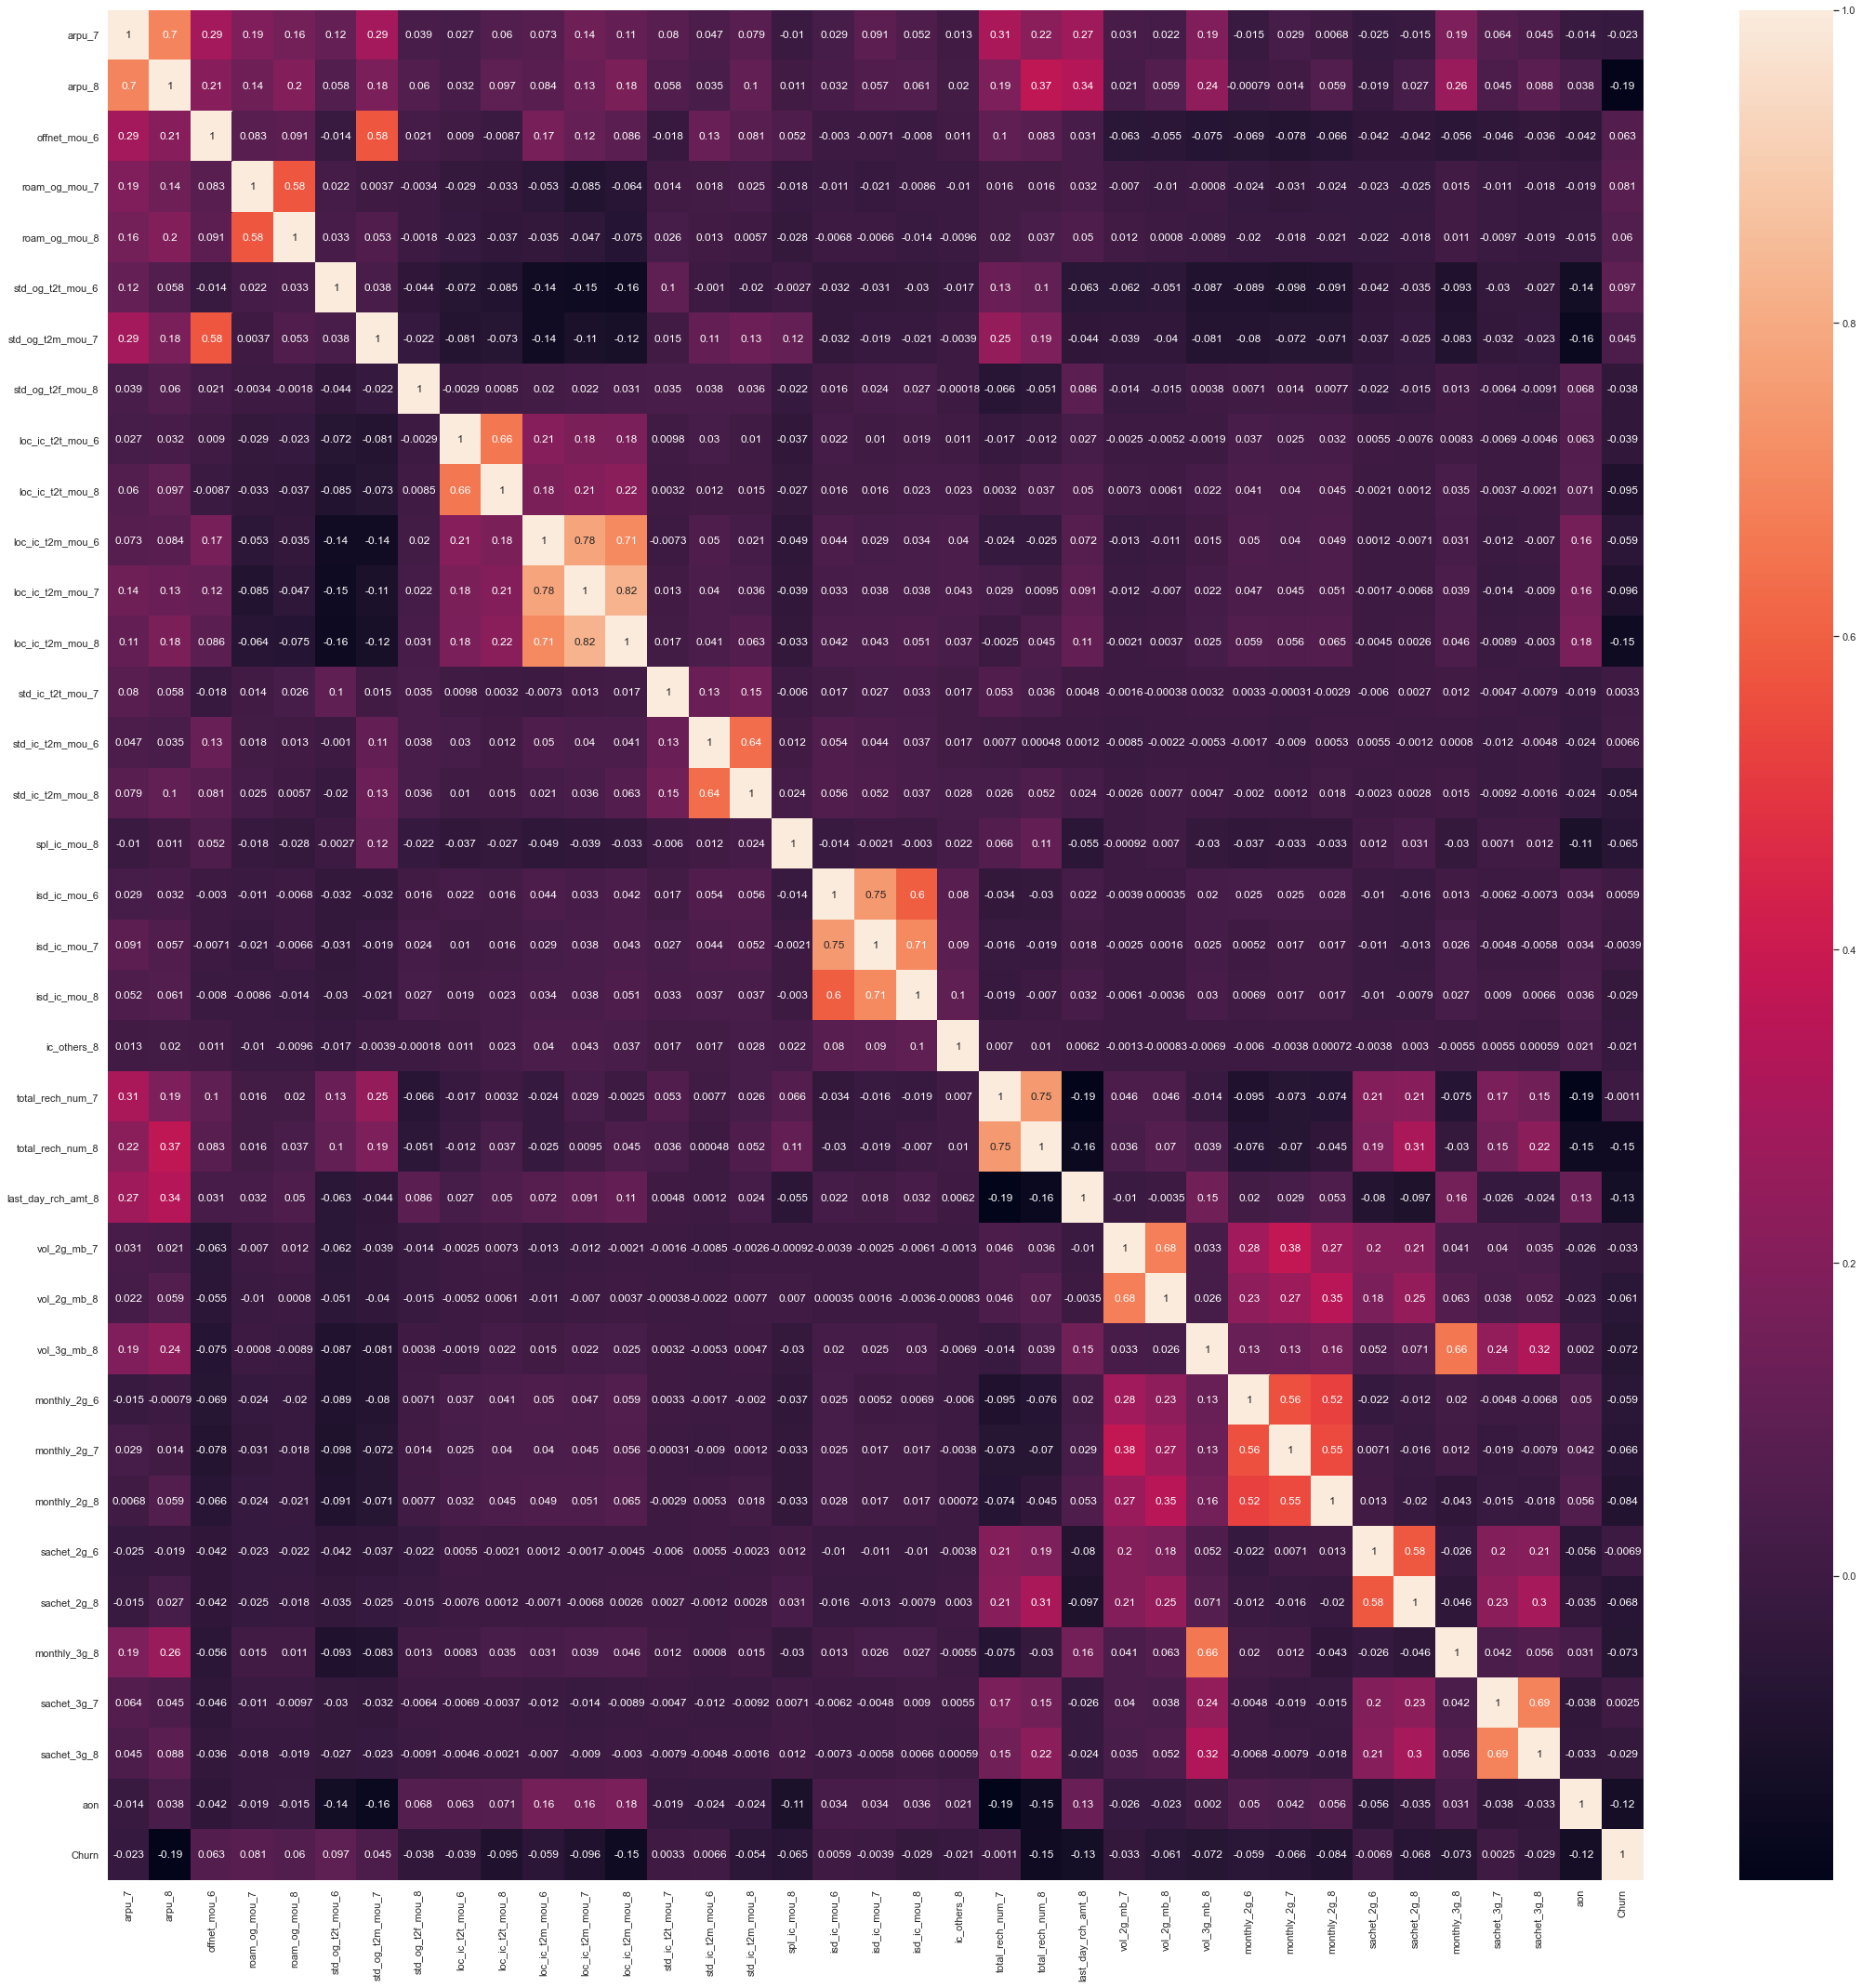

In [215]:
df_temp=X_train_RFE[col].copy()
df_temp['Churn']=y_train1

corrmat = np.corrcoef(df_temp.transpose())
plt.figure(figsize=[37,37])
sns.heatmap(corrmat, annot=True, xticklabels= list(df_temp.columns.values), yticklabels= list(df_temp.columns.values))

## Strong indicators are - 
1. arpu_8
2. loc_ic_t2m_mou_8
3. total_rech_num_8
4. last_day_rech_amt_8
5. aon  

In [216]:
final_df_LR=None
# Thus important features as per our analysis using Logistic regression

print("Important features are: ")
for i in range(len(vif)):
    print(str(i+1)+'. '+vif['Features'][i])

Important features are: 
1. arpu_7
2. arpu_8
3. offnet_mou_6
4. roam_og_mou_7
5. roam_og_mou_8
6. std_og_t2t_mou_6
7. std_og_t2m_mou_7
8. std_og_t2f_mou_8
9. loc_ic_t2t_mou_6
10. loc_ic_t2t_mou_8
11. loc_ic_t2m_mou_6
12. loc_ic_t2m_mou_7
13. loc_ic_t2m_mou_8
14. std_ic_t2t_mou_7
15. std_ic_t2m_mou_6
16. std_ic_t2m_mou_8
17. spl_ic_mou_8
18. isd_ic_mou_6
19. isd_ic_mou_7
20. isd_ic_mou_8
21. ic_others_8
22. total_rech_num_7
23. total_rech_num_8
24. last_day_rch_amt_8
25. vol_2g_mb_7
26. vol_2g_mb_8
27. vol_3g_mb_8
28. monthly_2g_6
29. monthly_2g_7
30. monthly_2g_8
31. sachet_2g_6
32. sachet_2g_8
33. monthly_3g_8
34. sachet_3g_7
35. sachet_3g_8
36. aon


## Suggestions are - 
1. The average revenue of the user for the 8th month should be taken under notice and if found less than the avg then give out offers
2. If the age of the connection is very high nand if the other strong indicators are low for the user then contact the user personally and catch his/her attention in good faith and give a compensating offer
3. Maintain competitive tarriffs